In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

import yfinance as yf
import pandas as pd
from scripts.utils import load_config
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.generate_secondary_stocks import calculate_indicators

In [2]:
# Let's set up our config settings so we have what we need.
config_path = os.path.join(project_root, 'config', 'config.yaml')
config = load_config(config_path)


In [3]:
# Now let's bring in the data we need from our config file.
core_tickers = config['yfinance']['core_tickers']
start_date = config['yfinance']['start_date']
end_date = config['yfinance']['end_date']

In [4]:


# Now let's start to bring in the data we need with the variables we just created.
def core_tickers_data(tickers, start, end):
    data = {}
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start = start, end = end)[["Close", "Volume", "Open", "High", "Low"]].copy()
            
            stock_data = calculate_indicators(stock_data)
            
            stock_data.rename(columns = {
                'Close' : 'Close_core',
                'Open' : 'Open_core',
                'High' : 'High_core',
                'Low' : 'Low_core',
                'Volume' : 'Volume_core',
                'SMA_sec' : 'SMA_core',
                'EMA_sec' : 'EMA_core',
                'RMA_sec' : 'RMA_core',
                'RSI_sec' : 'RSI_core',
                'BBM_sec' : 'BBM_core',
                'BBU_sec' : 'BBU_core',
                'BBL_sec' : 'BBL_core',
                'Stoch_K_sec' : 'Stoch_K_core',
                'Stoch_D_sec' : 'Stoch_D_core',
                'MACD_sec' : 'MACD_core',
                'MACD_Signal_sec' : 'MACD_Signal_core',
                'MACD_Hist_sec' : 'MACD_Hist_core',
                'ADX_14_sec' : 'ADX_14_core',
                'CCI_20_sec' : 'CCI_20_core',
                'ATR_14_sec' : 'ATR_14_core',
                'Momentum_1_sec' : 'Momentum_1_core',
                'Momentum_3_sec' : 'Momentum_3_core',
                'Momentum_7_sec' : 'Momentum_7_core',
                'Momentum_30_sec' : 'Momentum_30_core',
                'Momentum_50_sec' : 'Momentum_50_core',
                'OBV_sec' : 'OBV_core'
            }, inplace = True)
            
            data[ticker] = stock_data
        except Exception as e:
            print(f" Error downloading data for {ticker}: {e}")
    return data

def prep_time_series_df(data):
    df_list = []
    for ticker, df in data.items():
        df['Ticker'] = ticker
        df_list.append(df)
    combined_df = pd.concat(df_list)
    combined_df.reset_index(inplace=True)
    return combined_df

def check_missing_vals(df):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    return missing_data

core_data = core_tickers_data(core_tickers, start_date, end_date)

df = prep_time_series_df(core_data)

df['Date'] = pd.to_datetime(df['Date'])


df_missing = check_missing_vals(df)
print("Missing values before filling methods:", df_missing)

# We have some missing values we need to address here.  Let's take a look.
df.head(15)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Missing values before filling methods: SMA_core            490
RSI_core            130
BBM_core            490
BBU_core            490
BBL_core            490
ADX_14_core         260
CCI_20_core         380
ATR_14_core         130
Stoch_K_core        130
Stoch_D_core        150
Momentum_1_core      10
Momentum_3_core      30
Momentum_7_core      70
Momentum_30_core    300
Momentum_50_core    500
dtype: int64


,Date,Close_core,Volume_core,Open_core,High_core,Low_core,SMA_core,EMA_core,RMA_core,RSI_core,...,ATR_14_core,Stoch_K_core,Stoch_D_core,Momentum_1_core,Momentum_3_core,Momentum_7_core,Momentum_30_core,Momentum_50_core,OBV_core,Ticker
0,2019-03-14,45.932499,94318000,45.974998,46.025002,45.639999,NaN,45.932499,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,AAPL
1,2019-03-15,46.529999,156171600,46.212502,46.832500,45.935001,NaN,45.955930,1.012492,NaN,...,NaN,NaN,NaN,0.597500,NaN,NaN,NaN,NaN,156171600,AAPL
2,2019-03-18,47.005001,104879200,46.450001,47.097500,46.447498,NaN,45.997070,1.021913,NaN,...,NaN,NaN,NaN,0.475002,NaN,NaN,NaN,NaN,261050800,AAPL
3,2019-03-19,46.632500,126585600,47.087502,47.247501,46.480000,NaN,46.021989,1.013266,NaN,...,NaN,NaN,NaN,-0.372501,0.700001,NaN,NaN,NaN,134465200,AAPL
4,2019-03-20,47.040001,124140800,46.557499,47.372501,46.182499,NaN,46.061911,1.021234,NaN,...,NaN,NaN,NaN,0.407501,0.510002,NaN,NaN,NaN,258606000,AAPL
5,2019-03-21,48.772499,204136800,47.505001,49.082500,47.452499,NaN,46.168209,1.056409,NaN,...,NaN,NaN,NaN,1.732498,1.767498,NaN,NaN,NaN,462742800,AAPL
6,2019-03-22,47.762501,169630800,48.834999,49.422501,47.695000,NaN,46.230730,1.033133,NaN,...,NaN,NaN,NaN,-1.009998,1.130001,NaN,NaN,NaN,293112000,AAPL
7,2019-03-25,47.185001,175381200,47.877499,47.994999,46.650002,NaN,46.268152,1.019816,NaN,...,NaN,NaN,NaN,-0.577499,0.145000,1.252502,NaN,NaN,117730800,AAPL
8,2019-03-26,46.697498,199202000,47.915001,48.220001,46.145000,NaN,46.284989,1.008912,NaN,...,NaN,NaN,NaN,-0.487503,-2.075001,0.167500,NaN,NaN,-81471200,AAPL
9,2019-03-27,47.117500,119393600,47.187500,47.439999,46.637501,NaN,46.317637,1.017269,NaN,...,NaN,NaN,NaN,0.420002,-0.645000,0.112499,NaN,NaN,37922400,AAPL


In [5]:
# Let's start to examine our missing values more closely.  Looks like we can easily impute the RSI data, that's not an issue.  The SMA on the other hand needs a closer look.
print(df_missing)

SMA_core            490
RSI_core            130
BBM_core            490
BBU_core            490
BBL_core            490
ADX_14_core         260
CCI_20_core         380
ATR_14_core         130
Stoch_K_core        130
Stoch_D_core        150
Momentum_1_core      10
Momentum_3_core      30
Momentum_7_core      70
Momentum_30_core    300
Momentum_50_core    500
dtype: int64


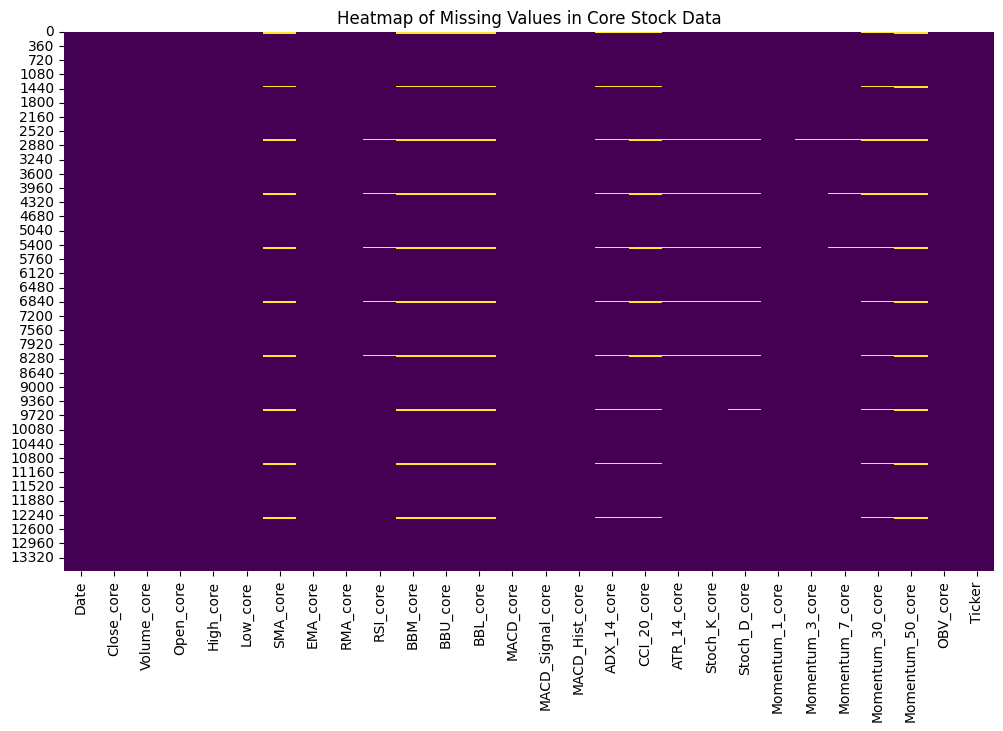

In [6]:
# Let's look at the location of those missing values and see if we can see if/how they are grouped.
plt.figure(figsize = (12,7))
sns.heatmap(df.isna(), cbar = False, cmap = 'viridis')
plt.title('Heatmap of Missing Values in Core Stock Data')
plt.show()

#### Looking at the above you can see that there patterns of missing values for most of our columns, and similar ones at that.  These we will impute with surrounding values.  We will look to impute here with a combination of forward filling, back filling, and then interpolating as well to get the best idea of what those missing values are so we don't have to drop them entirely.

In [7]:
# Let's make a quick function for our imputation and interpolation, we may need this again.
def fill_missing_vals(df):
    df.ffill(inplace = True)
    df.bfill(inplace = True)
    df.interpolate(method = 'linear', inplace = True)
    
    return df

df['SMA_core'] = fill_missing_vals(df['SMA_core'])
df['RSI_core'] = fill_missing_vals(df['RSI_core'])
df['BBM_core'] = fill_missing_vals(df['BBM_core'])
df['BBU_core'] = fill_missing_vals(df['BBU_core'])
df['BBL_core'] = fill_missing_vals(df['BBL_core'])
df['ADX_14_core'] = fill_missing_vals(df['ADX_14_core'])
df['CCI_20_core'] = fill_missing_vals(df['CCI_20_core'])
df['ATR_14_core'] = fill_missing_vals(df['ATR_14_core'])
df['Stoch_K_core'] = fill_missing_vals(df['Stoch_K_core'])
df['Stoch_D_core'] = fill_missing_vals(df['Stoch_D_core'])
df['Momentum_1_core'] = fill_missing_vals(df['Momentum_1_core'])
df['Momentum_3_core'] = fill_missing_vals(df['Momentum_3_core'])
df['Momentum_7_core'] = fill_missing_vals(df['Momentum_7_core'])
df['Momentum_30_core'] = fill_missing_vals(df['Momentum_30_core'])
df['Momentum_50_core'] = fill_missing_vals(df['Momentum_50_core'])


print(df.isna().sum())

Date                0
Close_core          0
Volume_core         0
Open_core           0
High_core           0
Low_core            0
SMA_core            0
EMA_core            0
RMA_core            0
RSI_core            0
BBM_core            0
BBU_core            0
BBL_core            0
MACD_core           0
MACD_Signal_core    0
MACD_Hist_core      0
ADX_14_core         0
CCI_20_core         0
ATR_14_core         0
Stoch_K_core        0
Stoch_D_core        0
Momentum_1_core     0
Momentum_3_core     0
Momentum_7_core     0
Momentum_30_core    0
Momentum_50_core    0
OBV_core            0
Ticker              0
dtype: int64


In [8]:
# So far so good.  Now let's start to set up and read in our exogenous data.
def dl_exogenous_data(start, end, exo_tickers):
    exo_data = {}
    for name, ticker in exo_tickers.items():
        try:
            data = yf.download(ticker, start = start, end = end)
            exo_data[name] = data['Close']
        except Exception as e:
            print(f"Error downloading data for {name} ({ticker}): {e}")
    exo_df = pd.DataFrame(exo_data)
    exo_df.reset_index(inplace=True)
    return exo_df

exo_tickers = config['yfinance']['exogenous_tickers']
exo_df = dl_exogenous_data(start_date, end_date, exo_tickers)

# Let's make sure our Date column is converted to datetime format to be used when we merge our dataframes for time series.
exo_df['Date'] = pd.to_datetime(exo_df['Date'])


# Let's take a quick look at the output.
print(exo_df.shape)
print(exo_df.describe())
exo_df.sample(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

(1415, 19)
                      Date  interest_rates_10yr         gold       copper  \
count                 1415          1365.000000  1366.000000  1366.000000   
mean   2021-11-28 04:48:00             2.485522  1814.614273     3.630447   
min    2019-03-14 00:00:00             0.499000  1269.300049     2.119500   
25%    2020-07-21 12:00:00             1.479000  1711.749969     2.909250   
50%    2021-11-29 00:00:00             2.068000  1818.549988     3.757500   
75%    2023-04-06 12:00:00             3.785000  1938.149963     4.239500   
max    2024-08-14 00:00:00             4.988000  2466.699951     5.119000   
std                    NaN             1.302289   242.180751     0.710585   

          platinum       silver    crude_oil  natural_gas         corn  \
count  1354.000000  1365.000000  1366.000000  1366.000000  1365.000000   
mean    957.283603    22.231136    69.041274     3.387759   512.124176   
min     595.900024    11.735000   -37.630001     1.482000   302.750000   

,Date,interest_rates_10yr,gold,copper,platinum,silver,crude_oil,natural_gas,corn,wheat,volatility_index,exchange_rate_usd_eur,exchange_rate_usd_jpy,sp500,nasdaq_100,dow_jones_industrial_average,consumer_confidence_index,vanguard_total_world_stock_etf,us_treasury_bond_etf
890,2022-08-11,2.888,1789.699951,3.7105,958.299988,20.326000,94.339996,8.874,629.25,810.75,20.200001,1.030078,132.830002,4207.270020,13291.990234,33336.671875,178.880005,93.089996,23.910000
398,2020-09-22,0.664,1898.599976,3.0590,856.500000,24.441999,39.599998,1.834,369.25,558.00,26.860001,1.176800,104.690002,3315.570068,11186.370117,27288.179688,159.979996,79.940002,27.969999
1183,2023-09-26,4.558,1900.400024,3.6250,906.500000,22.950001,90.389999,2.656,479.75,589.00,18.940001,1.059165,148.811005,4273.529785,14545.830078,33618.878906,91.080002,92.790001,22.049999
604,2021-07-07,1.321,1801.500000,4.3290,1080.199951,26.110001,72.199997,3.596,652.50,614.75,16.200001,1.182452,110.601997,4358.129883,14810.540039,34681.789062,200.830002,104.160004,26.770000
896,2022-08-19,2.989,1747.599976,3.6835,886.900024,19.058001,90.769997,9.336,626.00,753.25,20.600000,1.008990,135.794998,4228.479980,13242.900391,33706.738281,180.139999,92.430000,23.809999
1055,2023-03-30,3.551,1980.300049,4.0905,985.200012,23.902000,74.370003,2.104,649.50,692.25,19.020000,1.084363,132.576004,4050.830078,12963.139648,32859.031250,132.529999,91.129997,23.270000
1097,2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.072306,140.871002,NaN,NaN,NaN,NaN,NaN,NaN
0,2019-03-14,2.630,1293.400024,2.8885,825.599976,15.101000,58.610001,2.855,361.50,448.25,13.500000,1.133106,111.195999,2808.479980,7243.009766,25709.939453,124.010002,73.000000,24.870001
1333,2024-04-23,4.598,2327.699951,4.4905,913.700012,27.330999,83.360001,1.812,443.00,585.00,15.690000,1.065405,154.813004,5070.549805,17471.470703,38503.691406,95.470001,107.129997,22.230000
568,2021-05-18,1.642,1867.800049,4.7355,1223.400024,28.313999,65.489998,3.012,658.25,698.00,21.340000,1.215687,109.241997,4127.830078,13217.679688,34060.660156,182.770004,100.910004,26.270000


In [9]:
# Just looking at the sample readout we can see we have at least one row of missing values, time to investigate!
exo_df_missing = check_missing_vals(exo_df)
print(exo_df_missing)


interest_rates_10yr               50
gold                              49
copper                            49
platinum                          61
silver                            50
crude_oil                         49
natural_gas                       49
corn                              50
wheat                             50
volatility_index                  50
exchange_rate_usd_eur              1
exchange_rate_usd_jpy              1
sp500                             50
nasdaq_100                        50
dow_jones_industrial_average      50
consumer_confidence_index         50
vanguard_total_world_stock_etf    50
us_treasury_bond_etf              50
dtype: int64


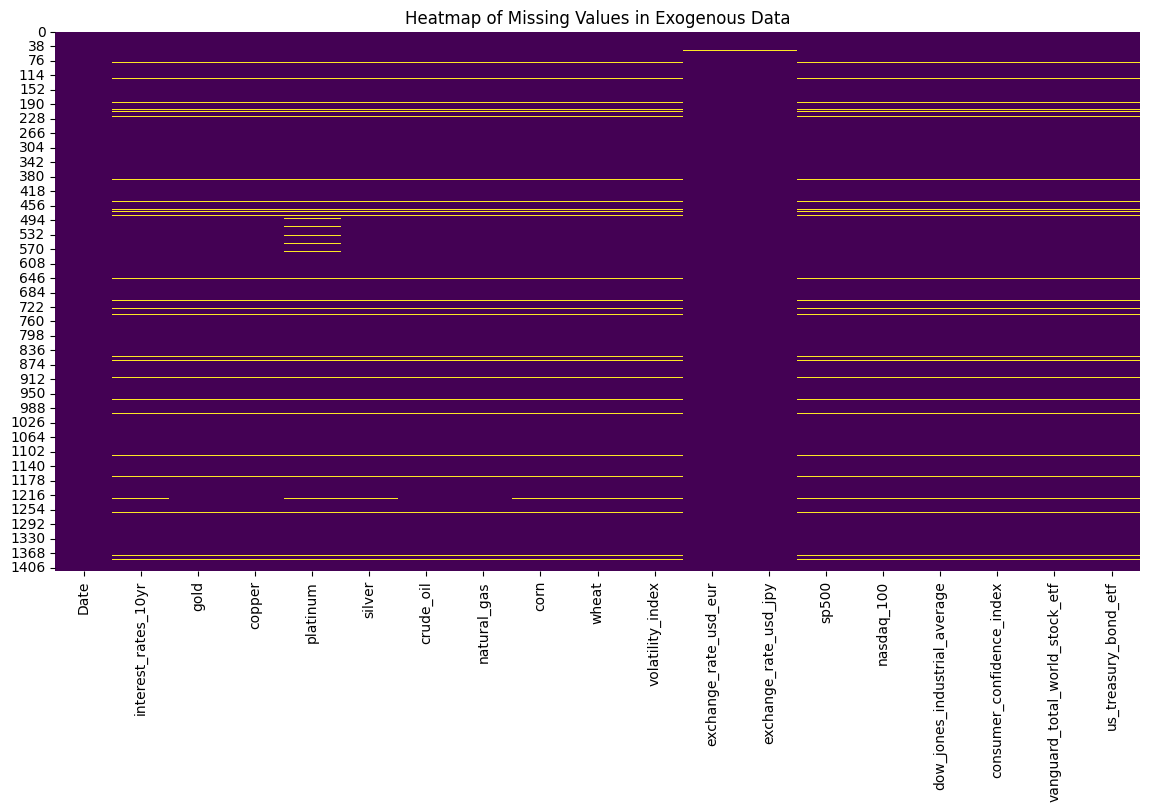

In [10]:
# Looks like mostly 52 rows, upwards of 63 for platinum. Before we address filling the missing values let's look a little closer at the missing values themselves with a heatmap and a correlation matrix.
plt.figure(figsize = (14,7))
sns.heatmap(exo_df.isna(), cbar = False, cmap = 'viridis')
plt.title('Heatmap of Missing Values in Exogenous Data')
plt.show()

#### Above you can see that our missing values are held constant across all rows and features, save for the platinum column that has a few more missing columns.  This will make it easier for us to impute our values.

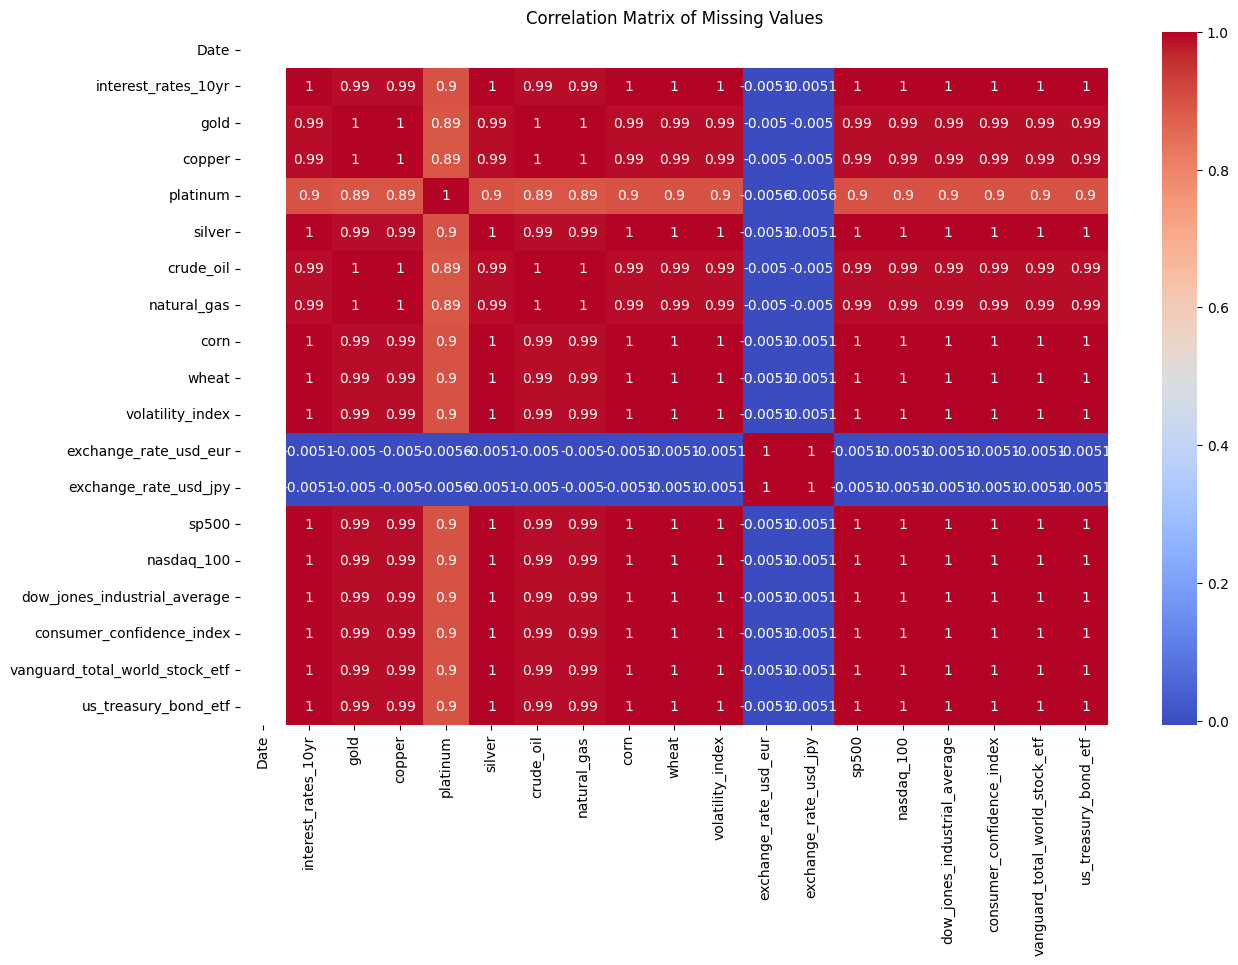

In [11]:
# Now let's plot the correlation matrix to see the relationship between missing values and their corresponding features.
na_df = exo_df.isna().astype(int)
plt.figure(figsize = (14,9))
sns.heatmap(na_df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Missing Values')
plt.show()

#### What we can take from the above plot is that the commodities (gold, silver, copper, etc.) are all highly correlated, meaning when one of those features has a missing value there is a high likelihood (over 90%) that another commodity will also be missing data for that date.  We can also see that the exchange rate data is showing very low correlation relationship, pretty much negative in fact for all relationships (aside from each other).  

In [12]:
# Now that we have properly identified and reviewed the missing values, let's go ahead and fill them, then check again to make sure all values are accounted for.
exo_df = fill_missing_vals(exo_df)

print(exo_df.isna().sum())

Date                              0
interest_rates_10yr               0
gold                              0
copper                            0
platinum                          0
silver                            0
crude_oil                         0
natural_gas                       0
corn                              0
wheat                             0
volatility_index                  0
exchange_rate_usd_eur             0
exchange_rate_usd_jpy             0
sp500                             0
nasdaq_100                        0
dow_jones_industrial_average      0
consumer_confidence_index         0
vanguard_total_world_stock_etf    0
us_treasury_bond_etf              0
dtype: int64


In [13]:
# Before saving I want to take both of these dataframes and make sure Date is our index for our EDA phase.
df.reset_index(drop = True, inplace = True)
df.set_index('Date', inplace = True)

exo_df.reset_index(drop = True, inplace = True)
exo_df.set_index('Date', inplace = True)

print(df.head())
print(exo_df.head())

            Close_core  Volume_core  Open_core  High_core   Low_core  \
Date                                                                   
2019-03-14   45.932499     94318000  45.974998  46.025002  45.639999   
2019-03-15   46.529999    156171600  46.212502  46.832500  45.935001   
2019-03-18   47.005001    104879200  46.450001  47.097500  46.447498   
2019-03-19   46.632500    126585600  47.087502  47.247501  46.480000   
2019-03-20   47.040001    124140800  46.557499  47.372501  46.182499   

            SMA_core   EMA_core  RMA_core  RSI_core  BBM_core  ...  \
Date                                                           ...   
2019-03-14   48.9614  45.932499  1.000000  67.22464   48.9614  ...   
2019-03-15   48.9614  45.955930  1.012492  67.22464   48.9614  ...   
2019-03-18   48.9614  45.997070  1.021913  67.22464   48.9614  ...   
2019-03-19   48.9614  46.021989  1.013266  67.22464   48.9614  ...   
2019-03-20   48.9614  46.061911  1.021234  67.22464   48.9614  ...   

    

In [14]:
# Great, let's save this data to another csv file for quick reference if we should need it.
df.to_csv(os.path.join(project_root, 'data', 'core_stock_data.csv'), index = True)

exo_df.to_csv(os.path.join(project_root, 'data', 'exogenous_data.csv'), index = True)